In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import fftpack

In [2]:
data = pd.read_csv('sunspot_data.csv')

In [3]:
data.drop(labels='Unnamed: 0',axis=1,inplace=True)

In [4]:
data.head()

Year  Month  Day  Date In Fraction Of Year  Number of Sunspots  \
0  1818      1    1                  1818.001                  -1   
1  1818      1    2                  1818.004                  -1   
2  1818      1    3                  1818.007                  -1   
3  1818      1    4                  1818.010                  -1   
4  1818      1    5                  1818.012                  -1   

   Standard Deviation  Observations  Indicator  
0                -1.0             0          1  
1                -1.0             0          1  
2                -1.0             0          1  
3                -1.0             0          1  
4                -1.0             0          1

In [5]:
data.drop(data[data['Number of Sunspots'] == -1].index,inplace=True)

In [6]:
data.head()

Year  Month  Day  Date In Fraction Of Year  Number of Sunspots  \
7   1818      1    8                  1818.021                  65   
12  1818      1   13                  1818.034                  37   
16  1818      1   17                  1818.045                  77   
17  1818      1   18                  1818.048                  98   
18  1818      1   19                  1818.051                 105   

    Standard Deviation  Observations  Indicator  
7                 10.2             1          1  
12                 7.7             1          1  
16                11.1             1          1  
17                12.6             1          1  
18                13.0             1          1

In [7]:
data1 = data.groupby(['Year']).agg({"Number of Sunspots":"sum"})
data1.head()

Number of Sunspots
Year                    
1818               11276
1819                9595
1820                5428
1821                2791
1822                2208

<AxesSubplot:xlabel='Year'>

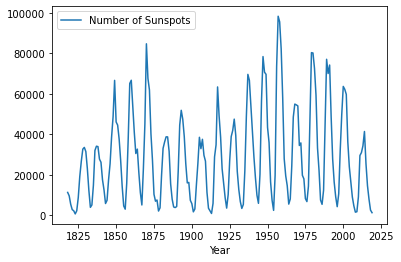

In [8]:
data1.plot()

In [9]:
sum_year = np.array(data1['Number of Sunspots'])

C:\Users\86138\AppData\Local\Temp/ipykernel_32788/21768266.py:3: RuntimeWarning: divide by zero encountered in true_divide
  periods = 1 / frequencies


(0.0, 22.0)

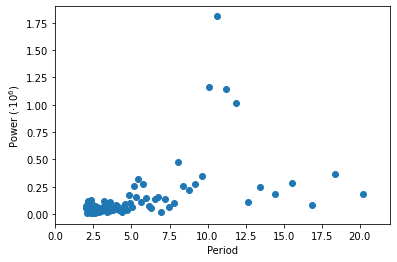

In [10]:
power = fftpack.fft(sum_year)
frequencies = fftpack.fftfreq(len(sum_year), 1)
periods = 1 / frequencies
plt.figure()
plt.plot(periods, abs(power) * 1e-6, 'o')
plt.xlabel('Period')
plt.ylabel('Power ($\cdot10^6$)')
plt.xlim(0, 22)

# 方波

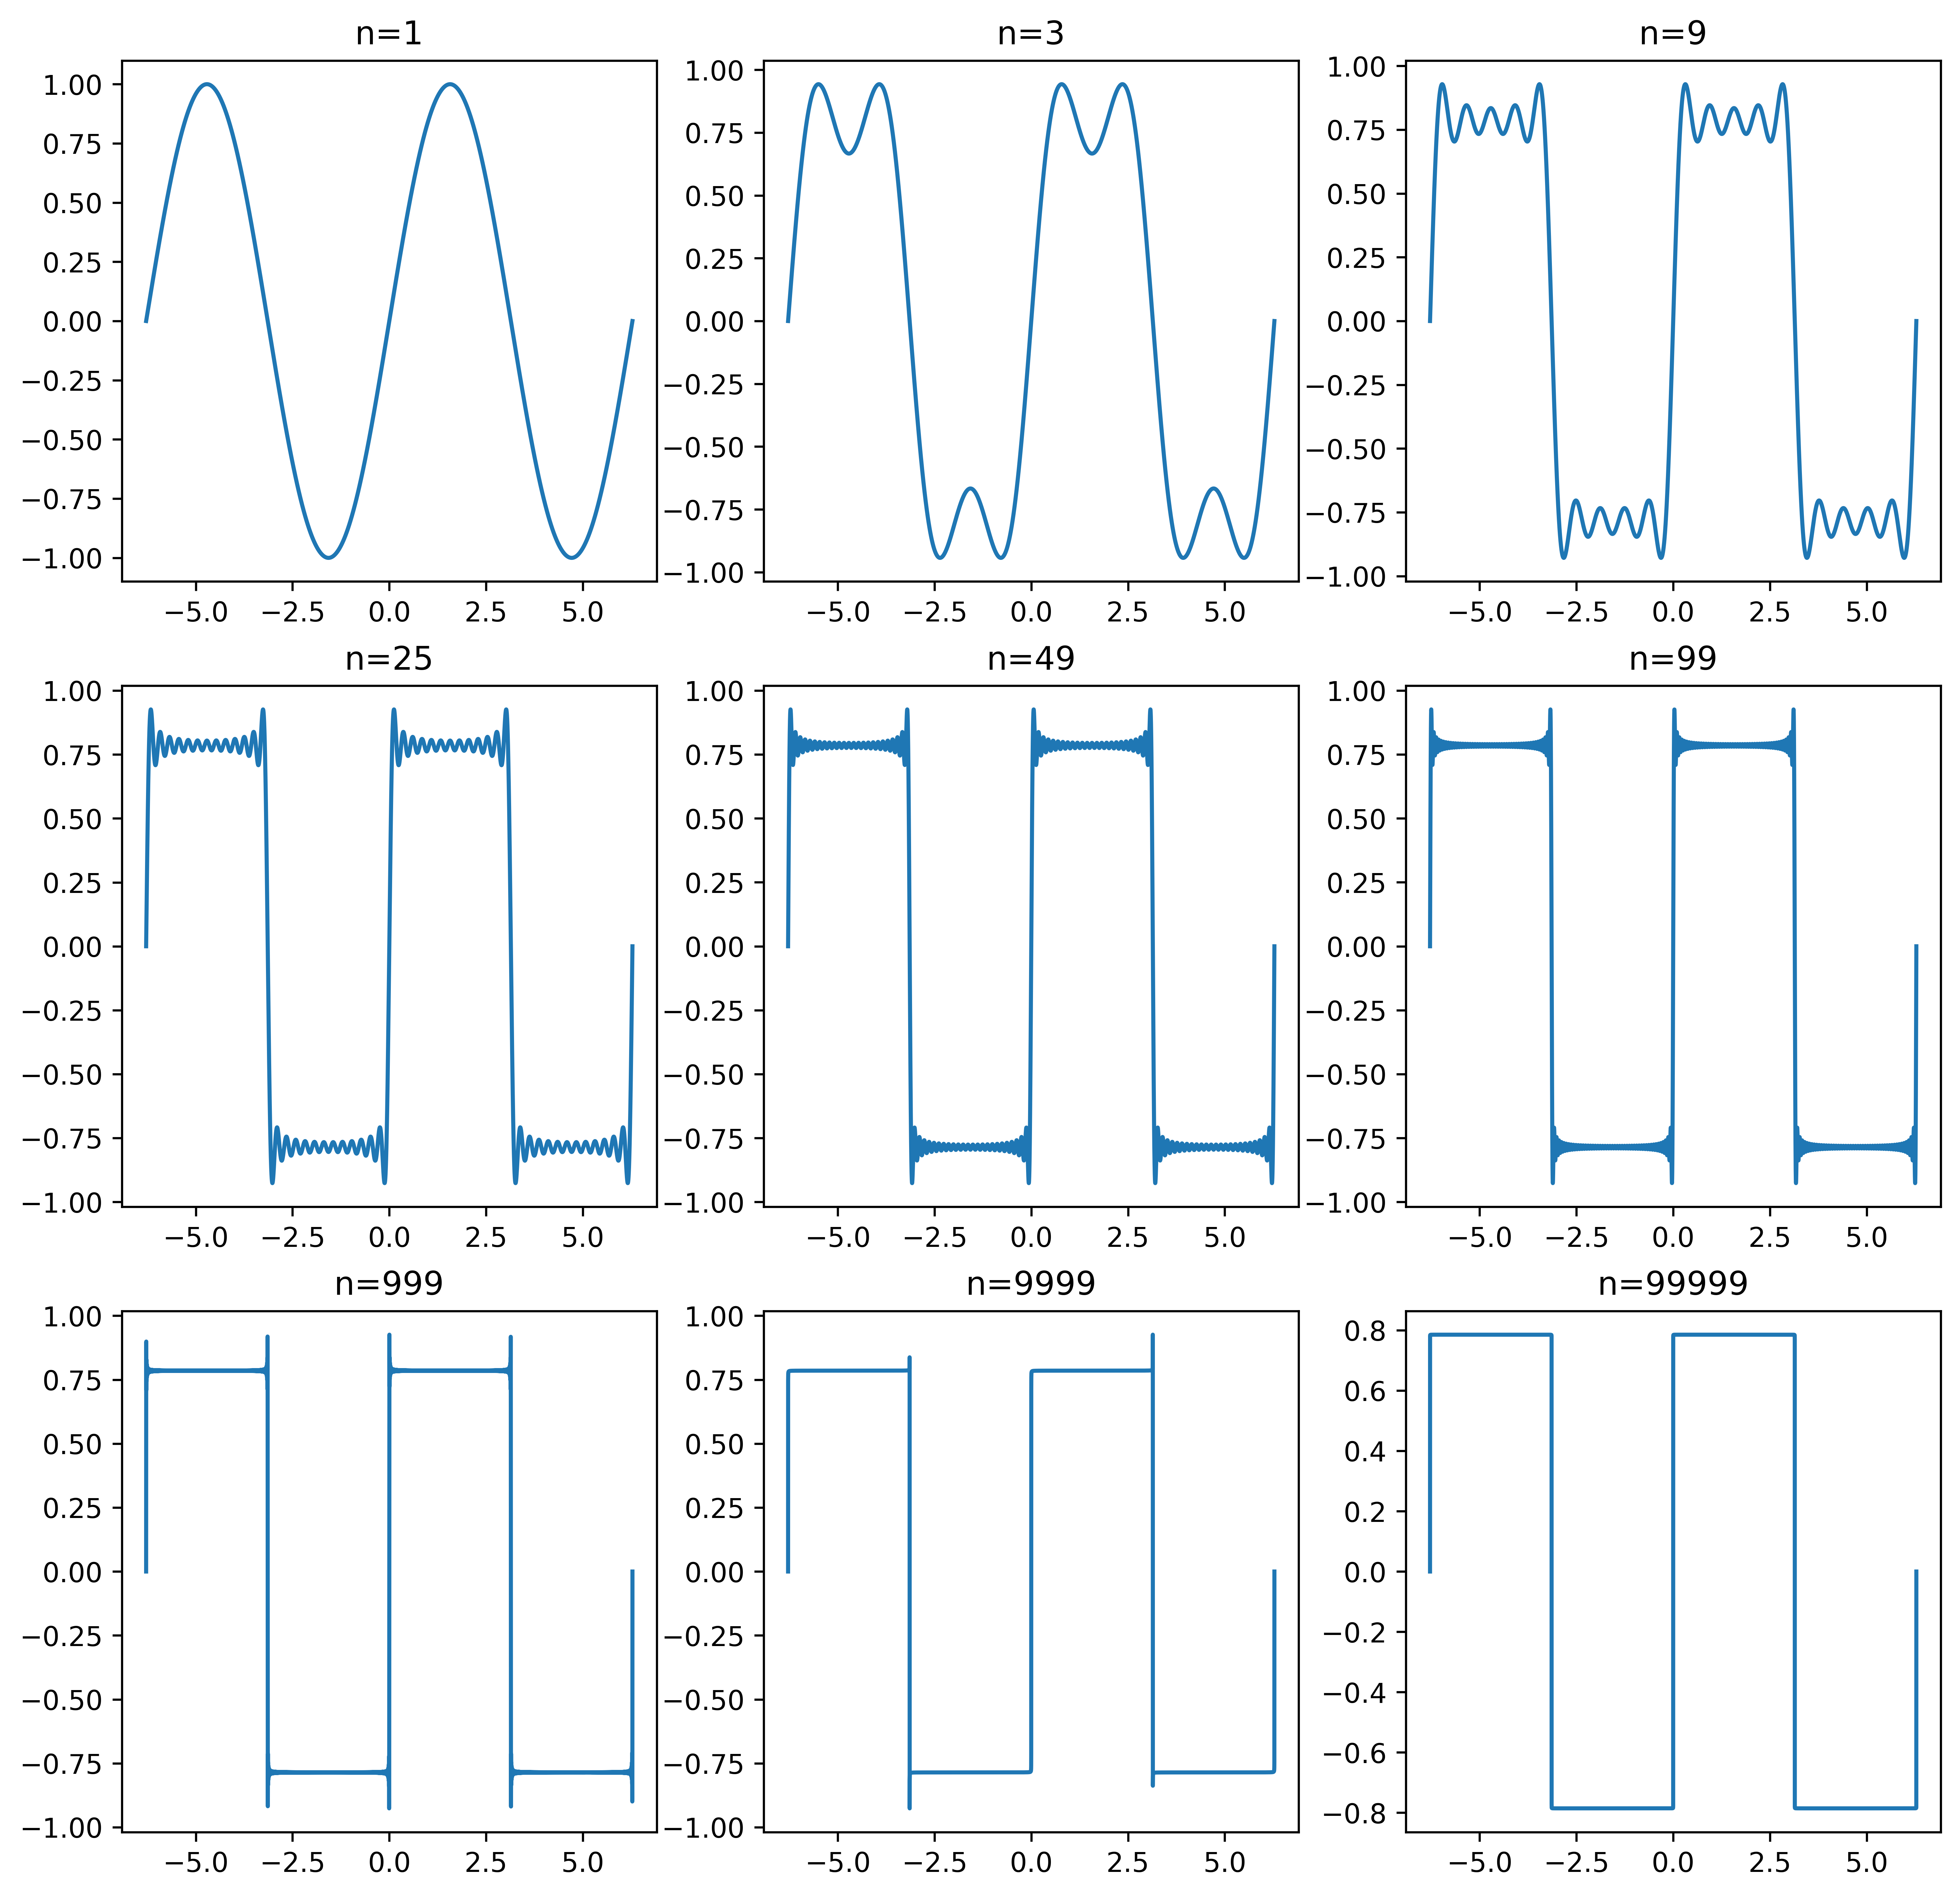

In [11]:
x = np.linspace(-2*np.pi,2*np.pi,10000)
n = [1,3,9,25,49,99,999,9999,99999]
plt.figure(figsize=(12,12),dpi=600)
for i in range(len(n)):
    y = 0
    for j in range(1,n[i]+1,2):
        y += np.sin(j*x) / j
    plt.subplot(331+i)
    plt.plot(x,y)
    plt.title(f'n={n[i]}')